## Gradient Descent From Scratch - Gradient Descent Variants (Batch/Mini-Batch/Stochastic)

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [41]:
a= -2
b = 1
x = np.linspace(0, 20, 100)
y = a * x + b + np.random.normal(0, 1, x.shape)

In [42]:
x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [43]:
y

array([ 2.46838570e+00, -6.28156021e-01,  1.35504624e+00,  1.65975641e-01,
        1.14037901e+00,  2.24603122e-02, -5.91657096e-01, -1.43024045e+00,
       -2.80218652e+00, -3.26173387e+00, -4.38240407e+00, -3.76233999e+00,
       -4.86887039e+00, -4.45832632e+00, -4.44616160e+00, -4.23131747e+00,
       -4.87935094e+00, -7.04586237e+00, -5.15562859e+00, -9.09824168e+00,
       -7.12983992e+00, -8.36842534e+00, -7.92439326e+00, -8.22981774e+00,
       -9.57276562e+00, -8.14350671e+00, -1.01281990e+01, -9.30622366e+00,
       -1.05280790e+01, -1.07669268e+01, -1.13848150e+01, -1.28254365e+01,
       -1.25298824e+01, -1.16506211e+01, -1.31053623e+01, -1.03949810e+01,
       -1.38920426e+01, -1.48974234e+01, -1.60270042e+01, -1.39098054e+01,
       -1.40089497e+01, -1.52378775e+01, -1.79805599e+01, -1.65254173e+01,
       -1.53450989e+01, -1.79618219e+01, -1.80270440e+01, -1.76385100e+01,
       -1.78433830e+01, -1.87324095e+01, -1.88726953e+01, -1.99128687e+01,
       -1.94660498e+01, -

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [ ]:
def BGDregression(X, Y, alpha,max_iter):
    theta_0 =0
    theta_1 = 0
    tol = 1e-4
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    for i in range(max_iter):
        y_pred = theta_0 + theta_1 * X
        ypred.append(y_pred)
        
        J = (1/(2*len(X))) * np.sum((y_pred - Y)**2)
        loss.append(J)

        grad_0 = (1/len(X)) * np.sum(y_pred - Y)
        grad_1 = (1/len(X)) * np.sum((y_pred - Y) * X)

        theta_0 = theta_0 - alpha * grad_0 
        theta_1 = theta_1 - alpha * grad_1
        theta0.append(theta_0)
        theta1.append(theta_1)

        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break
                
        epochs += 1


    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

#### Try your function with any input parameterss of your choice.

In [45]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = BGDregression(x, y, 0.001, 100)

Converged after 53 iterations.


#### Calculate r2 score

In [46]:
r2_score(y, ypred[-1])

0.990047767650853

In [47]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.990047767650853

#### Plot loss vs. epochs

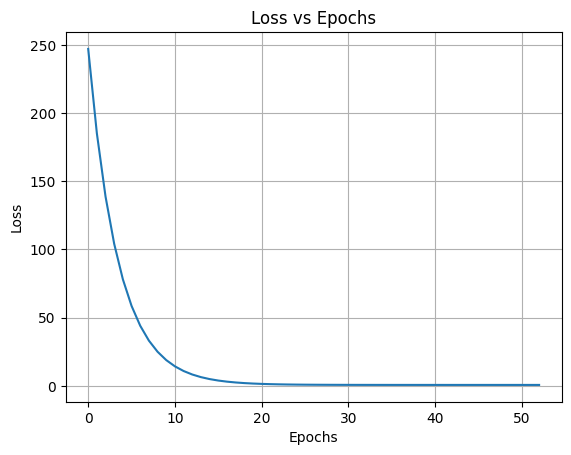

In [48]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

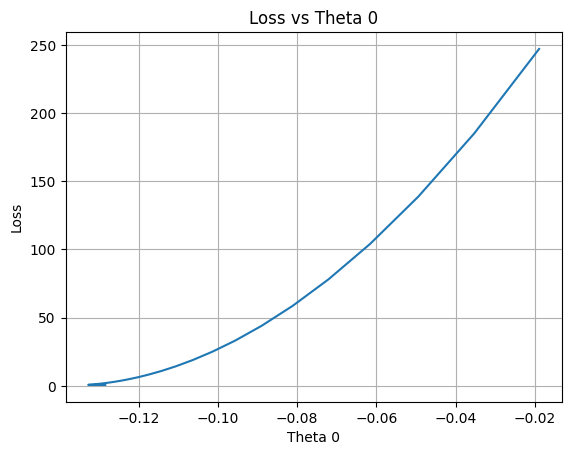

In [49]:
plt.plot(theta0,loss)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


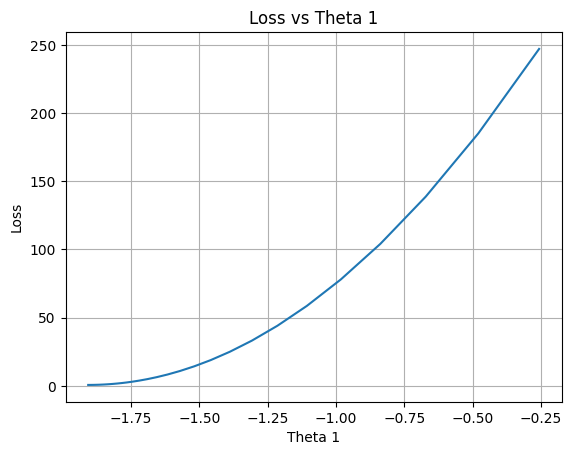

In [50]:
plt.plot(theta1,loss)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

#### Plot all regression lines till converge

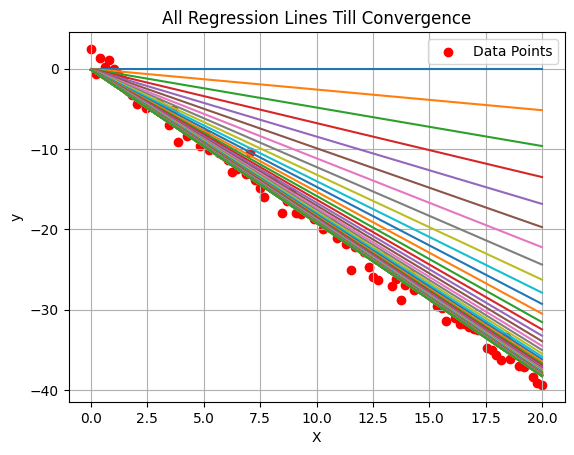

In [51]:
for i in range(len(ypred)):
    plt.plot(x, ypred[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

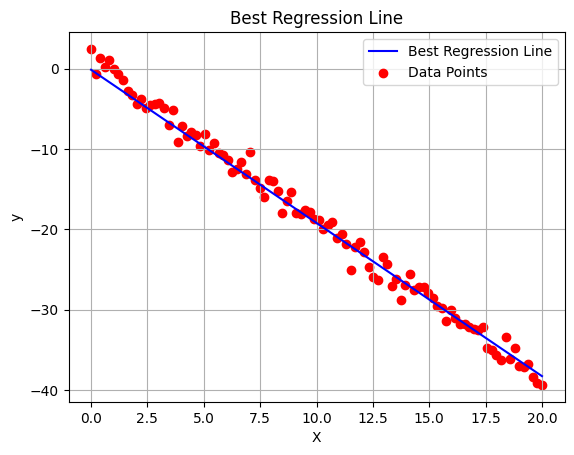

In [52]:
best_ypred = theta_0 + theta_1 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [53]:
theta_zero, theta_one, loss_2, ypred_2, theta_0_, theta_1_, epochs_2 = BGDregression(x, y, 0.01, 500)

Converged after 393 iterations.


#### Calculate r2 score

In [54]:
r2_score(y, ypred_2[-1])

0.9918157868280381

In [55]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred_2[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9918157868280381

#### Plot loss vs. epochs

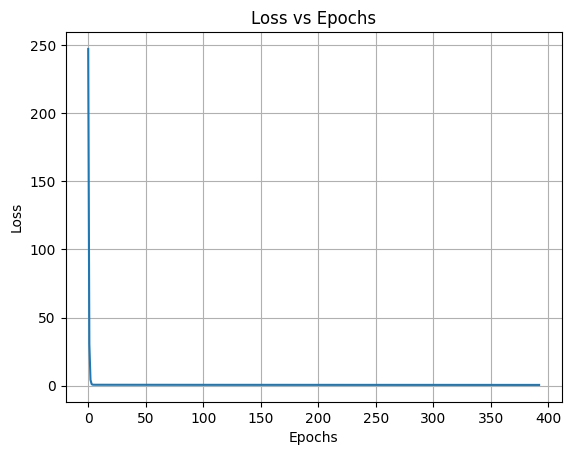

In [56]:
plt.plot(loss_2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

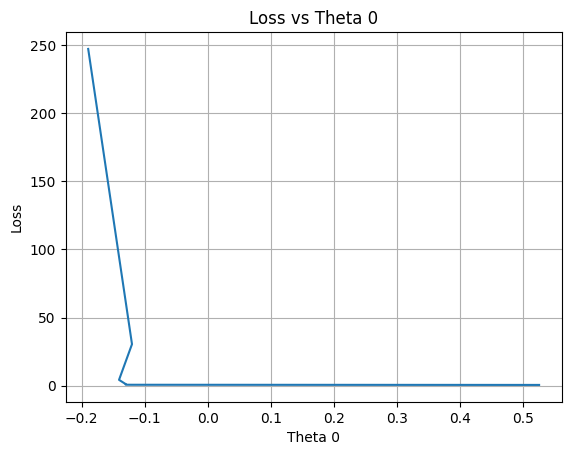

In [57]:
plt.plot(theta_zero,loss_2)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


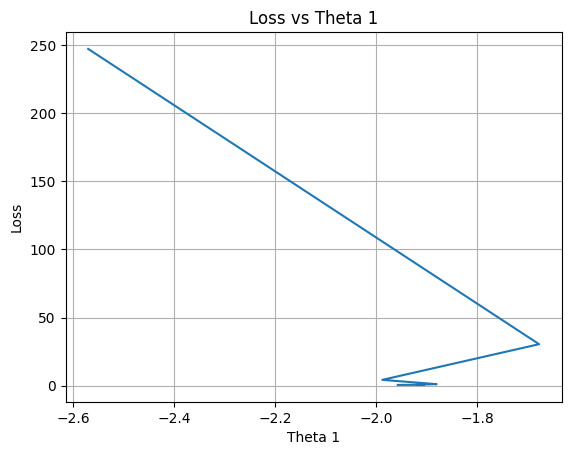

In [58]:
plt.plot(theta_one,loss_2)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

#### Plot all regression lines till converge

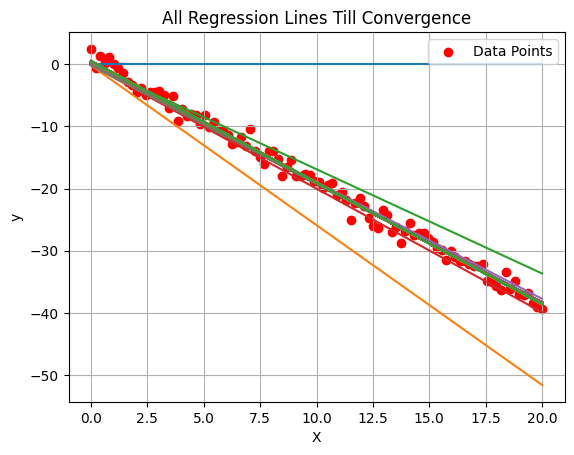

In [59]:
for i in range(len(ypred_2)):
    plt.plot(x, ypred_2[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

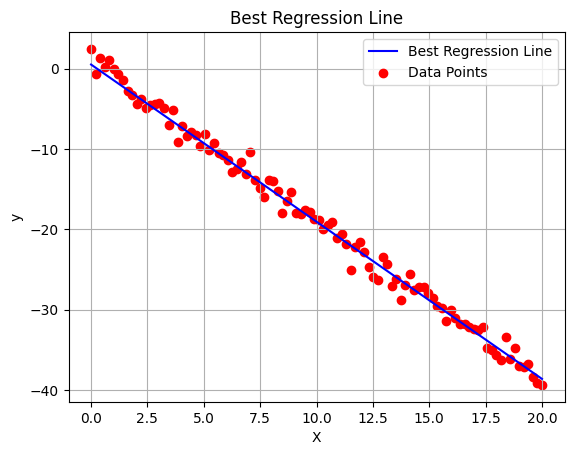

In [60]:
best_ypred = theta_0_ + theta_1_ * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [61]:
def MBGDregression(X, Y, alpha, max_iter, batch_size):
    theta_0 = 0
    theta_1 = 0
    tol = 1e-2
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    n = len(X)
    
    for i in range(max_iter):
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        for start in range(0, n, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            Y_batch = Y_shuffled[start:end]
        
            y_pred = theta_0 + theta_1 * X_batch
            ypred.append(theta_0 + theta_1 * X)
            
            J = (1/(2*len(X_batch))) * np.sum((y_pred - Y_batch)**2)
            loss.append(J)
            
            grad_0 = (1/len(X_batch)) * np.sum(y_pred - Y_batch)
            grad_1 = (1/len(X_batch)) * np.sum((y_pred - Y_batch) * X_batch)
            
            theta_0 = theta_0 - alpha * grad_0
            theta_1 = theta_1 - alpha * grad_1
            theta0.append(theta_0)
            theta1.append(theta_1)
        
        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break
        
        epochs += 1
    
    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

In [62]:
theta0_3, theta1_3, loss_3, ypred_3, theta_0_3, theta_1_3, epochs_3 = MBGDregression(x, y, 0.001, 100, 10)

Converged after 86 iterations.


#### Calculate r2 score

In [63]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred_3[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9907312114295743

In [64]:
r2_score(y, ypred_3[-1])

0.9907312114295743

#### Plot loss vs. epochs

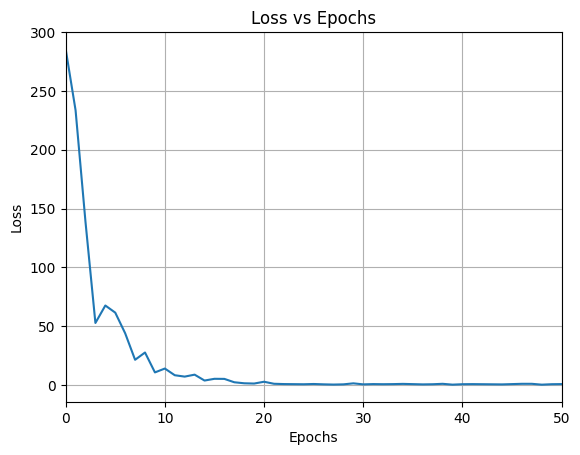

In [65]:
plt.plot(loss_3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.xlim(0,50)
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

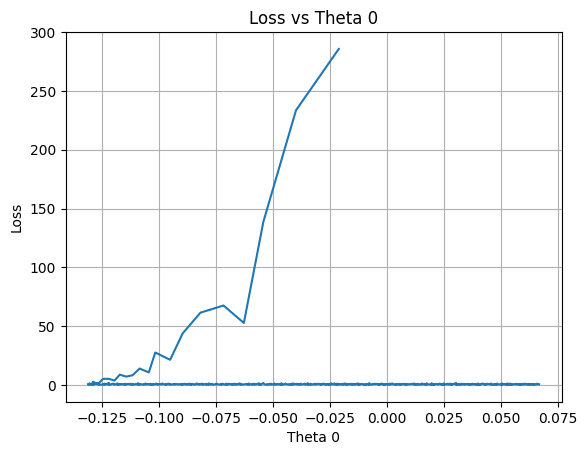

In [66]:
plt.plot(theta0_3,loss_3)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


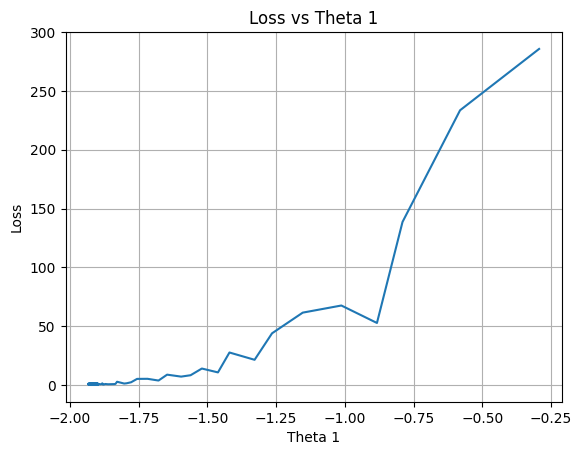

In [67]:
plt.plot(theta1_3,loss_3)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

#### Plot all regression lines till converge

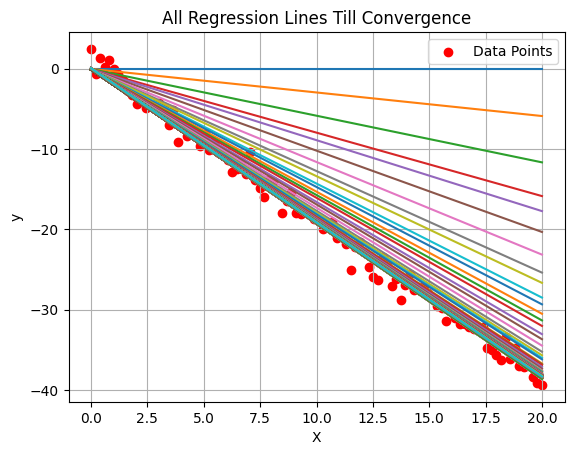

In [68]:
for i in range(len(ypred_3)):
    plt.plot(x, ypred_3[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

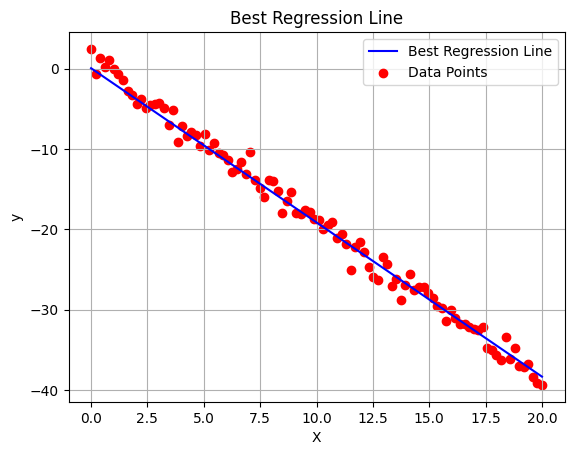

In [69]:
best_ypred = theta_0_3 + theta_1_3 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [70]:
def SGDregression(X, Y, alpha, max_iter):
    theta_0 = 0
    theta_1 = 0
    tol = 1e-3
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    n = len(X)
    
    for i in range(max_iter):
        for j in range(n):
            y_pred = theta_0 + theta_1 * X[j]
            ypred.append(theta_0 + theta_1 * X)
            
            J = (y_pred- Y[j])**2
            loss.append(J)
            
            grad_0 = (y_pred - Y[j])
            grad_1 = (y_pred - Y[j]) * X[j]
            
            theta_0 = theta_0 - alpha * grad_0
            theta_1 = theta_1 - alpha * grad_1
            theta0.append(theta_0)
            theta1.append(theta_1)
        
        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break
        
        epochs += 1
    
    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

In [71]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = SGDregression(x, y, 0.001, 100)

#### Calculate r2 score

In [72]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9919958673141903

In [73]:
r2_score(y, ypred[-1])

0.9919958673141903

#### Plot loss vs. epochs

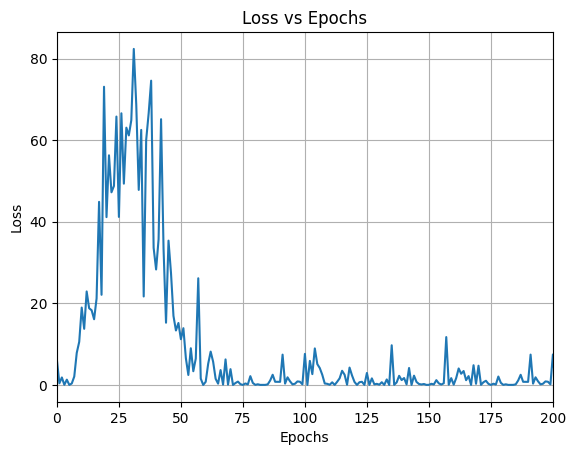

In [74]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.xlim(0,200)
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

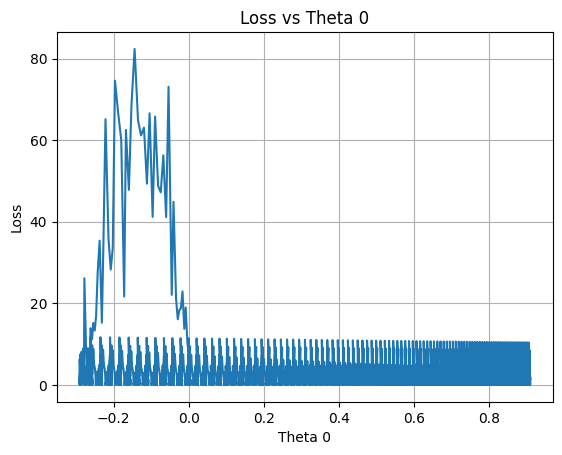

In [75]:
plt.plot(theta0,loss)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


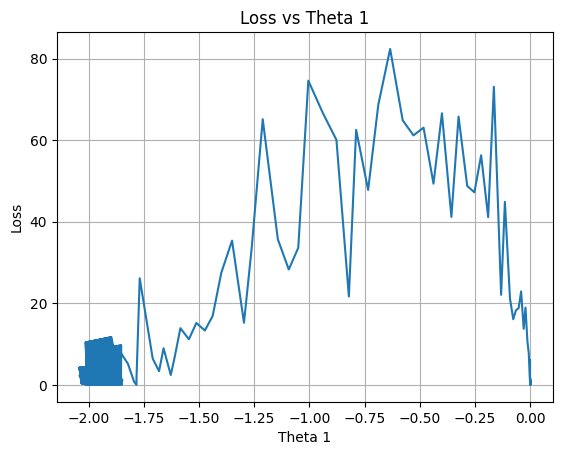

In [76]:
plt.plot(theta1,loss)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

#### Plot all regression lines till converge

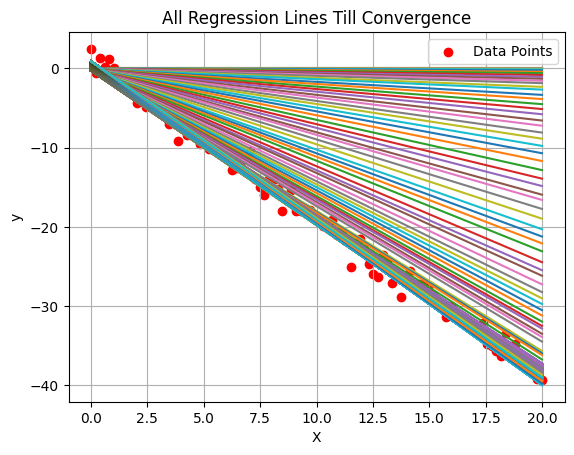

In [77]:
for i in range(len(ypred)):
    plt.plot(x, ypred[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

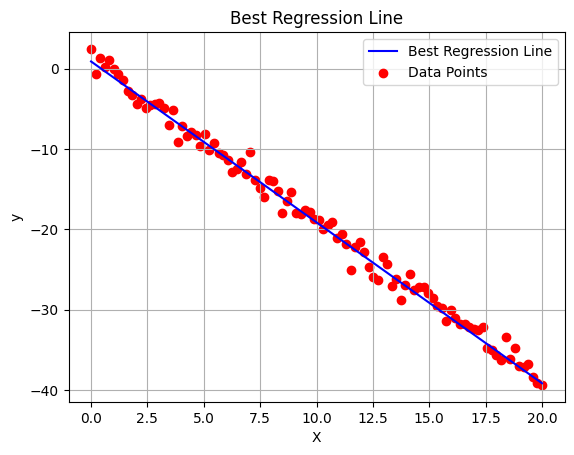

In [78]:
best_ypred = theta_0 + theta_1 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

- SGD is computationally efficient but highly noisy, which may slow convergence.
- Batch GD is stable but computationally expensive and memory-intensive.
- Mini-Batch GD is the best compromise, balancing efficiency, stability, and speed.